In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data()
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
           "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
y_train = pd.Series(y_train, name="PRICE")
y_test = pd.Series(y_test, name="PRICE")
X_train.head()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [5]:
y_pred = model.predict(X_test_scaled)
pd.DataFrame({"Actual": y_test[:10], "Predicted": y_pred[:10]})

,Actual,Predicted
0,7.2,9.692672
1,18.8,21.058594
2,19.0,20.941455
3,27.0,34.252234
4,22.2,25.959026
5,24.5,20.567410
6,31.2,28.153104
7,22.9,25.071139
8,20.5,20.305195
9,23.2,22.824895


In [6]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4.8161809825237025


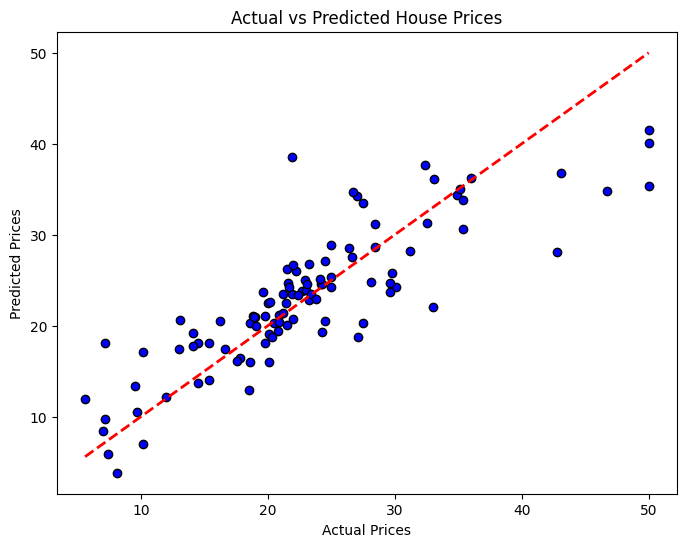

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()